# Project of into Machine learning
dataset source: https://www.kaggle.com/datasets/whenamancodes/student-performance

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading Dataset**

In [3]:
df1 = pd.read_csv("Maths.csv")
df2 = pd.read_csv("Portuguese.csv")
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(1048, 33)

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**Review the first 5 rows**

In [5]:
df[df.columns[:16]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no


In [6]:
df[df.columns[16:]].head()

,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1048 non-null   object
 1   sex         1048 non-null   object
 2   age         1048 non-null   int64 
 3   address     1048 non-null   object
 4   famsize     1048 non-null   object
 5   Pstatus     1048 non-null   object
 6   Medu        1048 non-null   int64 
 7   Fedu        1048 non-null   int64 
 8   Mjob        1048 non-null   object
 9   Fjob        1048 non-null   object
 10  reason      1048 non-null   object
 11  guardian    1048 non-null   object
 12  traveltime  1048 non-null   int64 
 13  studytime   1048 non-null   int64 
 14  failures    1048 non-null   int64 
 15  schoolsup   1048 non-null   object
 16  famsup      1048 non-null   object
 17  paid        1048 non-null   object
 18  activities  1048 non-null   object
 19  nursery     1048 non-null   object
 20  higher  

## Feature descriptions

![feature_description_1](Features1.png)
![feature_description_2](Features2.png)
![feature_description_3](Features3.png)
![feature_description_4](Features4.png)

## Explore data analysis 

### 1. Data Preparing ###

**Remove some unneccessary features**

In [8]:
data = df.drop(['school', 'G1', 'G2', 'reason'], axis= 1)

### 2. Data understanding ###

**Review Unique values in Features**

In [9]:
data.nunique()

sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G3            19
dtype: int64

**Determining Feature Category**

In [10]:
# Numerical Features
numericals = ['absences', 'G3']

# Categorical Features
categoricals = data.columns.drop(numericals).to_list()

print("Numerical features:\n{}\nTotal: {} features\n".format(numericals, len(numericals)))
print("Categorical features:\n{}\nTotal: {} features".format(categoricals, len(categoricals)))

Numerical features:
['absences', 'G3']
Total: 2 features

Categorical features:
['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
Total: 27 features


* **Determining Target:**
<br>Our target is determining student's performance but the final grade prove their ability
<br>So that, we choose **G3** (final grade) as the target.

In [11]:
Target = 'G3'
numericals.remove('G3')

* **Review Features**

1. Target

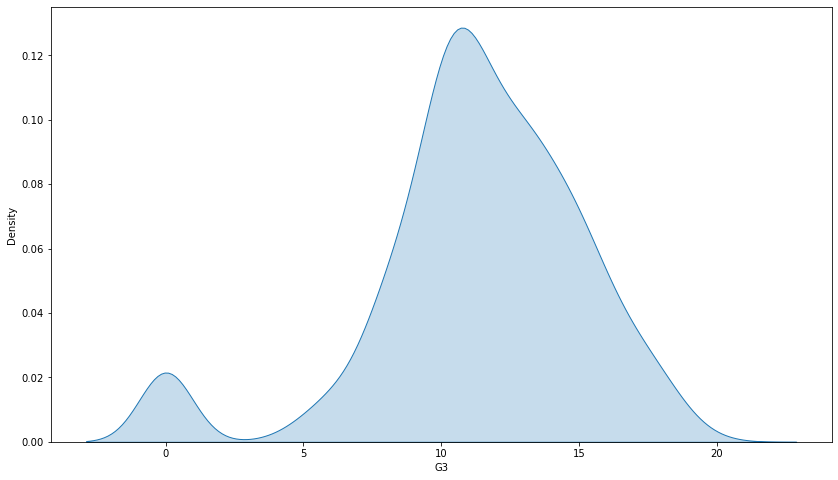

In [12]:
plt.figure(figsize=(14,8))
sns.kdeplot(data= data, x= Target, fill='blue')
plt.show()

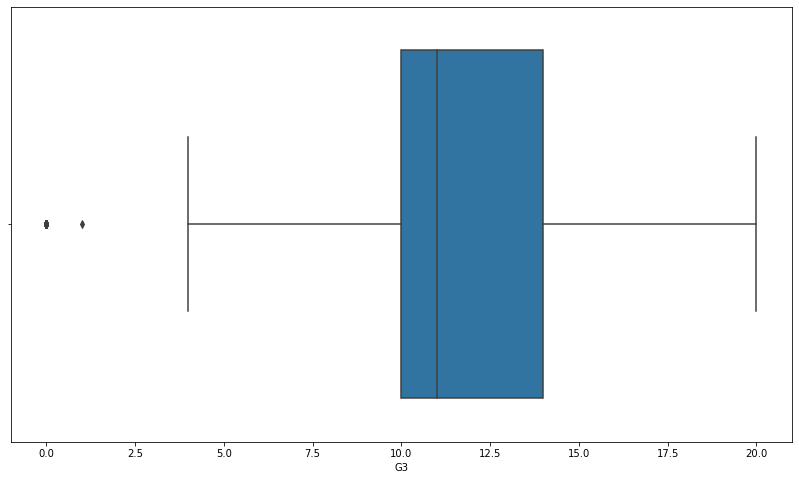

In [13]:
plt.figure(figsize=(14,8))
sns.boxplot(data=data, x=Target)
plt.show()

* The target is ***right skewed Distribution***
* The are some outliers in the target

*Handle the outlier in the target:*

In [14]:
data[Target].describe()

count    1048.000000
mean       11.326336
std         3.876852
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

Some information about the target variable and dataset:
* Right skewed distribution
* Outliers are 0/1 scores, which is natural outliers 
* This is not a large dataset (1048 instances)
<br><br>
*=> We should replace the outliers with **median** value*

In [16]:
# definte IQR
IQR = data[Target].quantile(0.75) - data[Target].quantile(0.25) 
IQR

4.0

In [17]:
data[Target] = np.where(df[Target] < IQR, df[Target].quantile(0.5), df[Target])

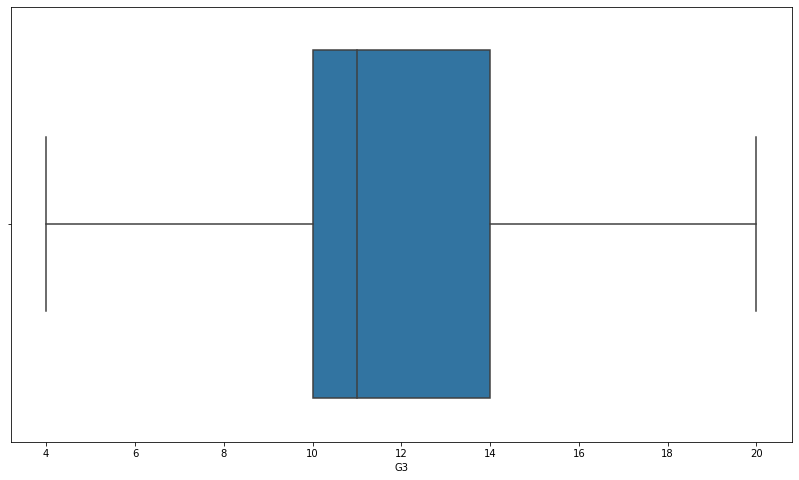

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(data=data, x=Target)
plt.show()

2. Numerical Features

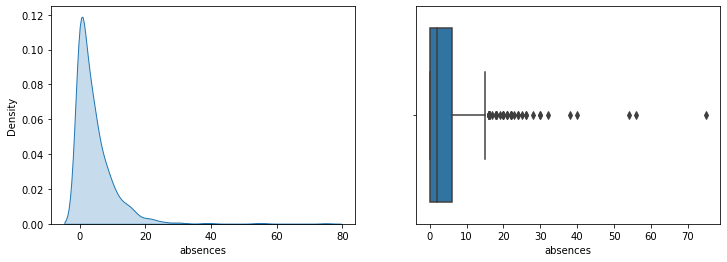

In [17]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 4))
sns.kdeplot(data = df, x = numericals[0], fill='blue', ax = ax[0])  
sns.boxplot(data = df,  x = numericals[0], ax = ax[1])  
plt.show()

The `absences` is **extremly left skewed distribution** and has **a lot of outliers**
<br><br>
--> This feature need some processing

In [18]:
data['absences'].describe()

count    1048.000000
mean        4.427481
std         6.201372
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64

<AxesSubplot:xlabel='abs_cat', ylabel='count'>

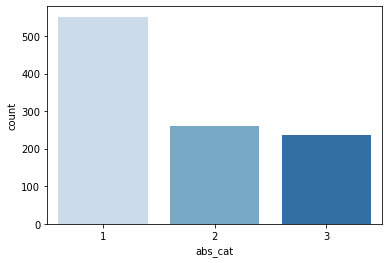

In [19]:
data['abs_cat'] = pd.qcut(df['absences'], 4, duplicates='drop', labels= [1, 2, 3])
data['abs_cat'] = data['abs_cat'].astype('int64')
sns.countplot(x=data['abs_cat'], palette='Blues')

In [20]:
data.drop('absences', inplace=True, axis=1)
data.shape

(1048, 29)

*--> By converting `absences` to categorical feature, we handled the skewed and outliers*
<br><br>
***=> The dataset is full of categorical columns now***

In [21]:
categoricals.append('abs_cat')

3. Categorical Features

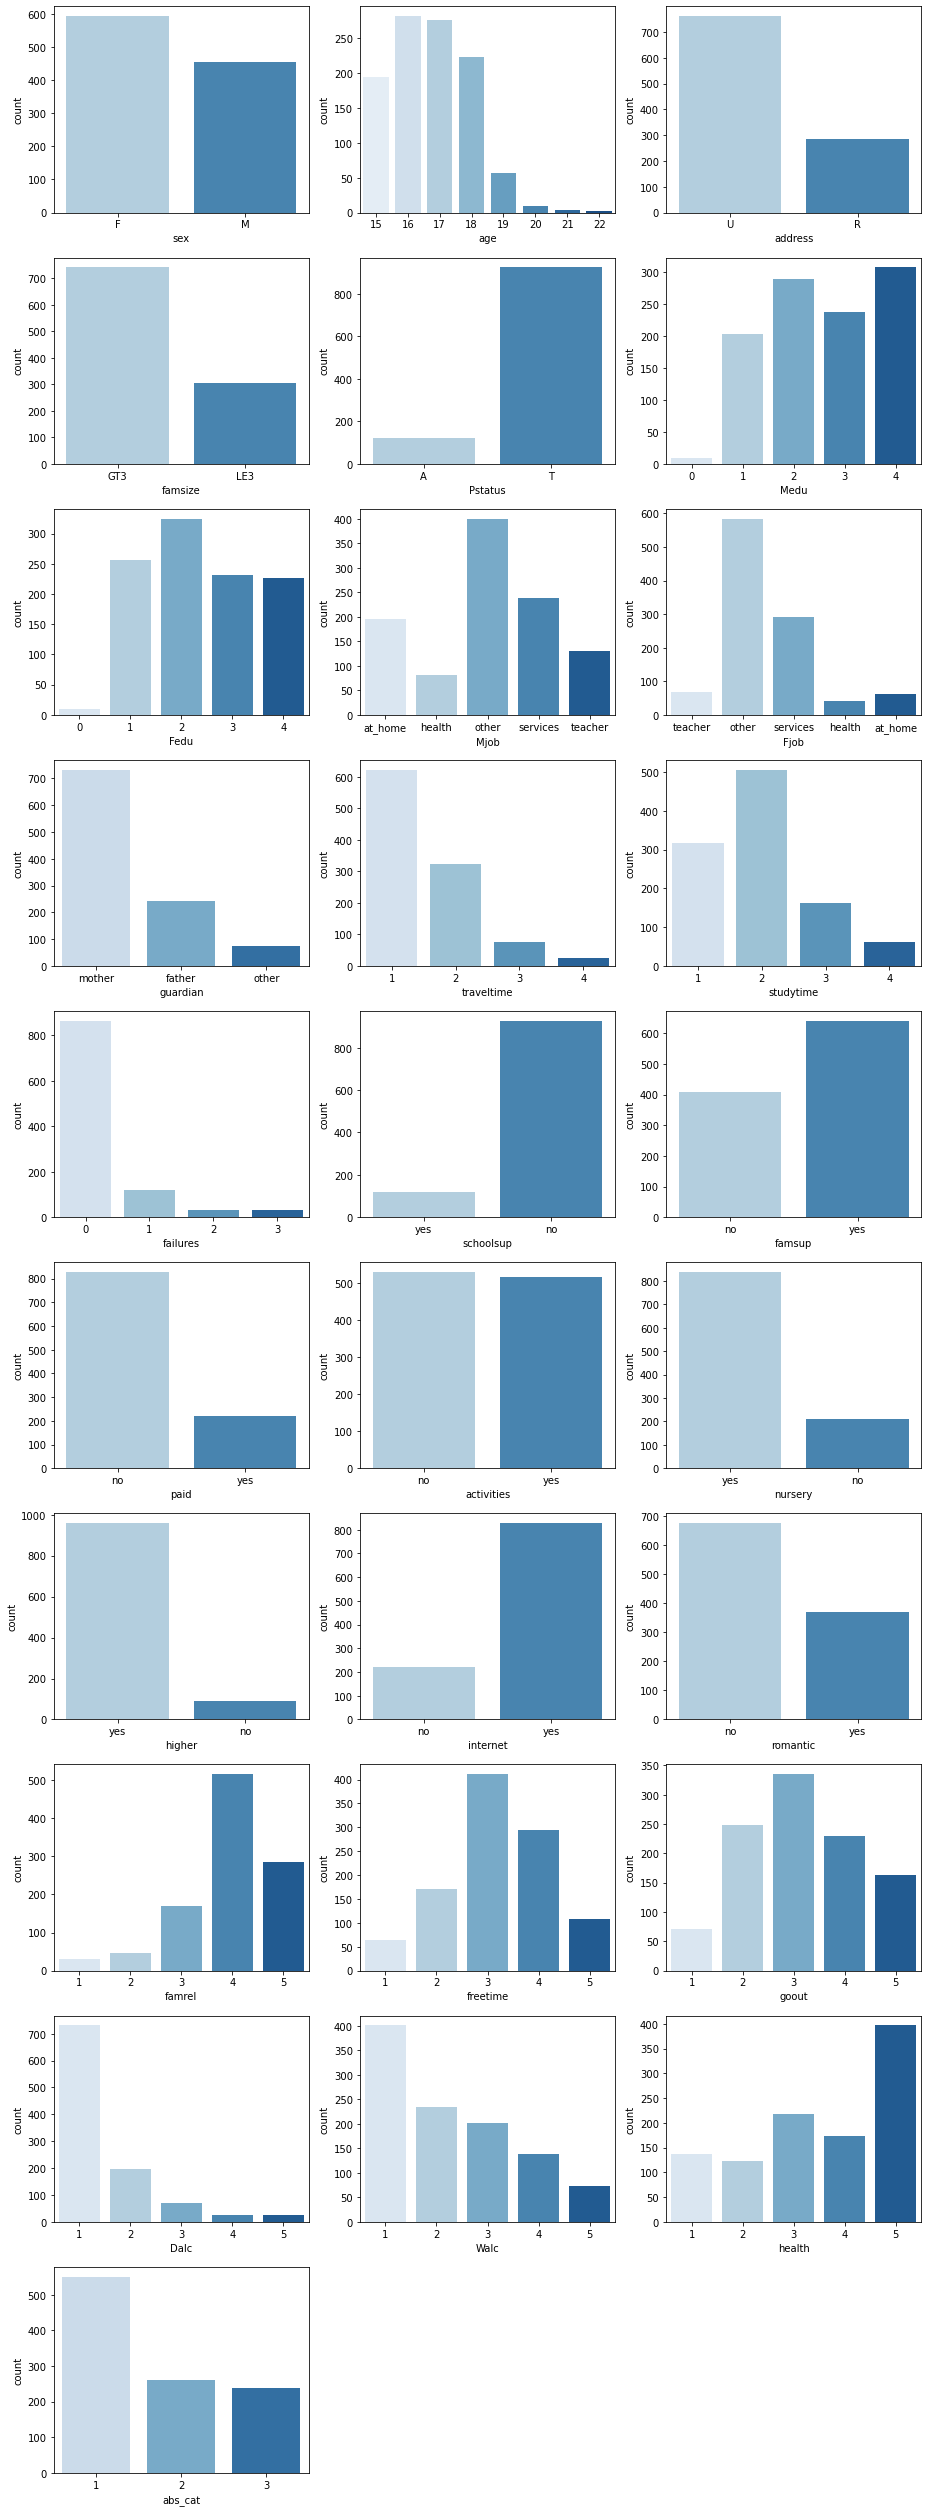

In [22]:
fig, ax = plt.subplots(ncols = 3, nrows = 10, figsize = (13, 35))
for i in range(10): 
    ax_i1 = ax[i, 0]
    sns.countplot(data = data, x = categoricals[i*3], ax = ax_i1, palette='Blues')  
    if (i*3 + 1 == len(categoricals)):
        break
    ax_i2 = ax[i, 1]
    sns.countplot(data = data, x = categoricals[i*3+1], ax = ax_i2, palette='Blues') 
    ax_i3 = ax[i, 2]
    sns.countplot(data = data, x = categoricals[i*3+2], ax = ax_i3, palette='Blues')  
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)
fig.tight_layout()
plt.show()

* **Missing Values**

In [23]:
null_col = [col for col in df.columns if df[col].isnull().sum() > 0]
print(null_col)

[]


*--> The dataset contains no missing value*

### 3. Data Correlations ###

**Heatmap**

<AxesSubplot:>

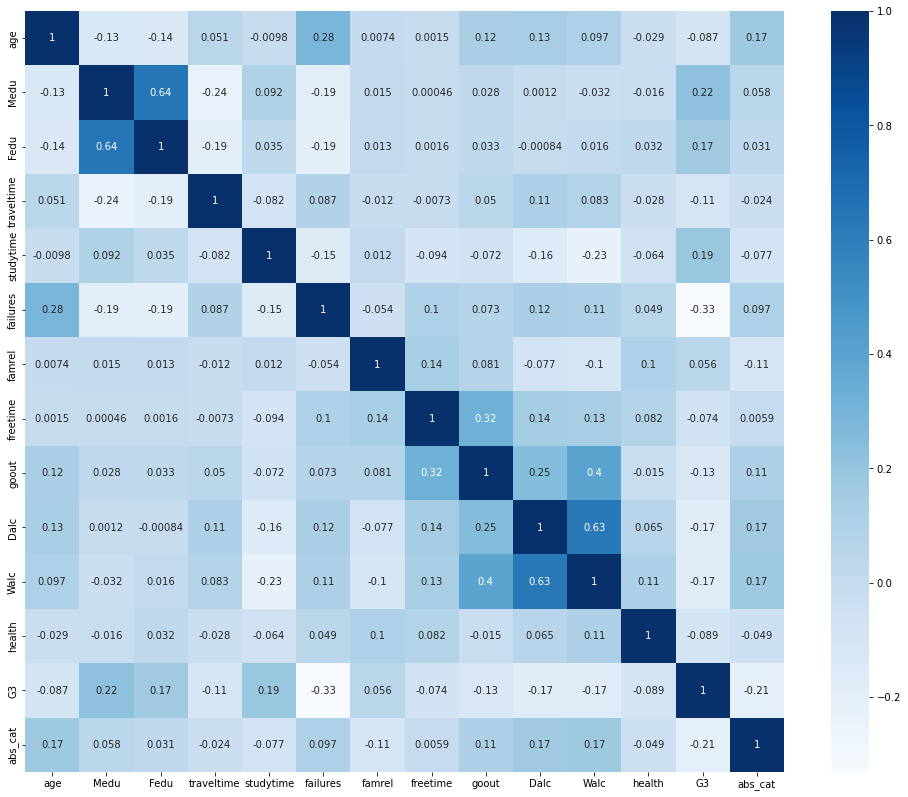

In [24]:
correlations = data.corr()
plt.figure(figsize=(17,14))
sns.heatmap(correlations, annot=True, cmap='Blues')

*Some features highly correlate to the target `G3`:*
* `Medu`        : 0.2
* `Fedu`        : 0.16
* `studytime`   : 0.16
* `Walc`        : -0.12
* `age`         : -0.13
* `Dalc`        : -0.13
* `failures`    : -0.38

*And the correlation between them:*
* `Medu` | `Fedu` : 0.64
* `Walc` | `Dalc` : 0.63
* `failures` | `age` : 0.28
* `failures` | `studytime` : -0.15
* `failures` | `Medu` : -0.19
* `failures` | `Fedu` : -0.19

**Features and Target relationships**

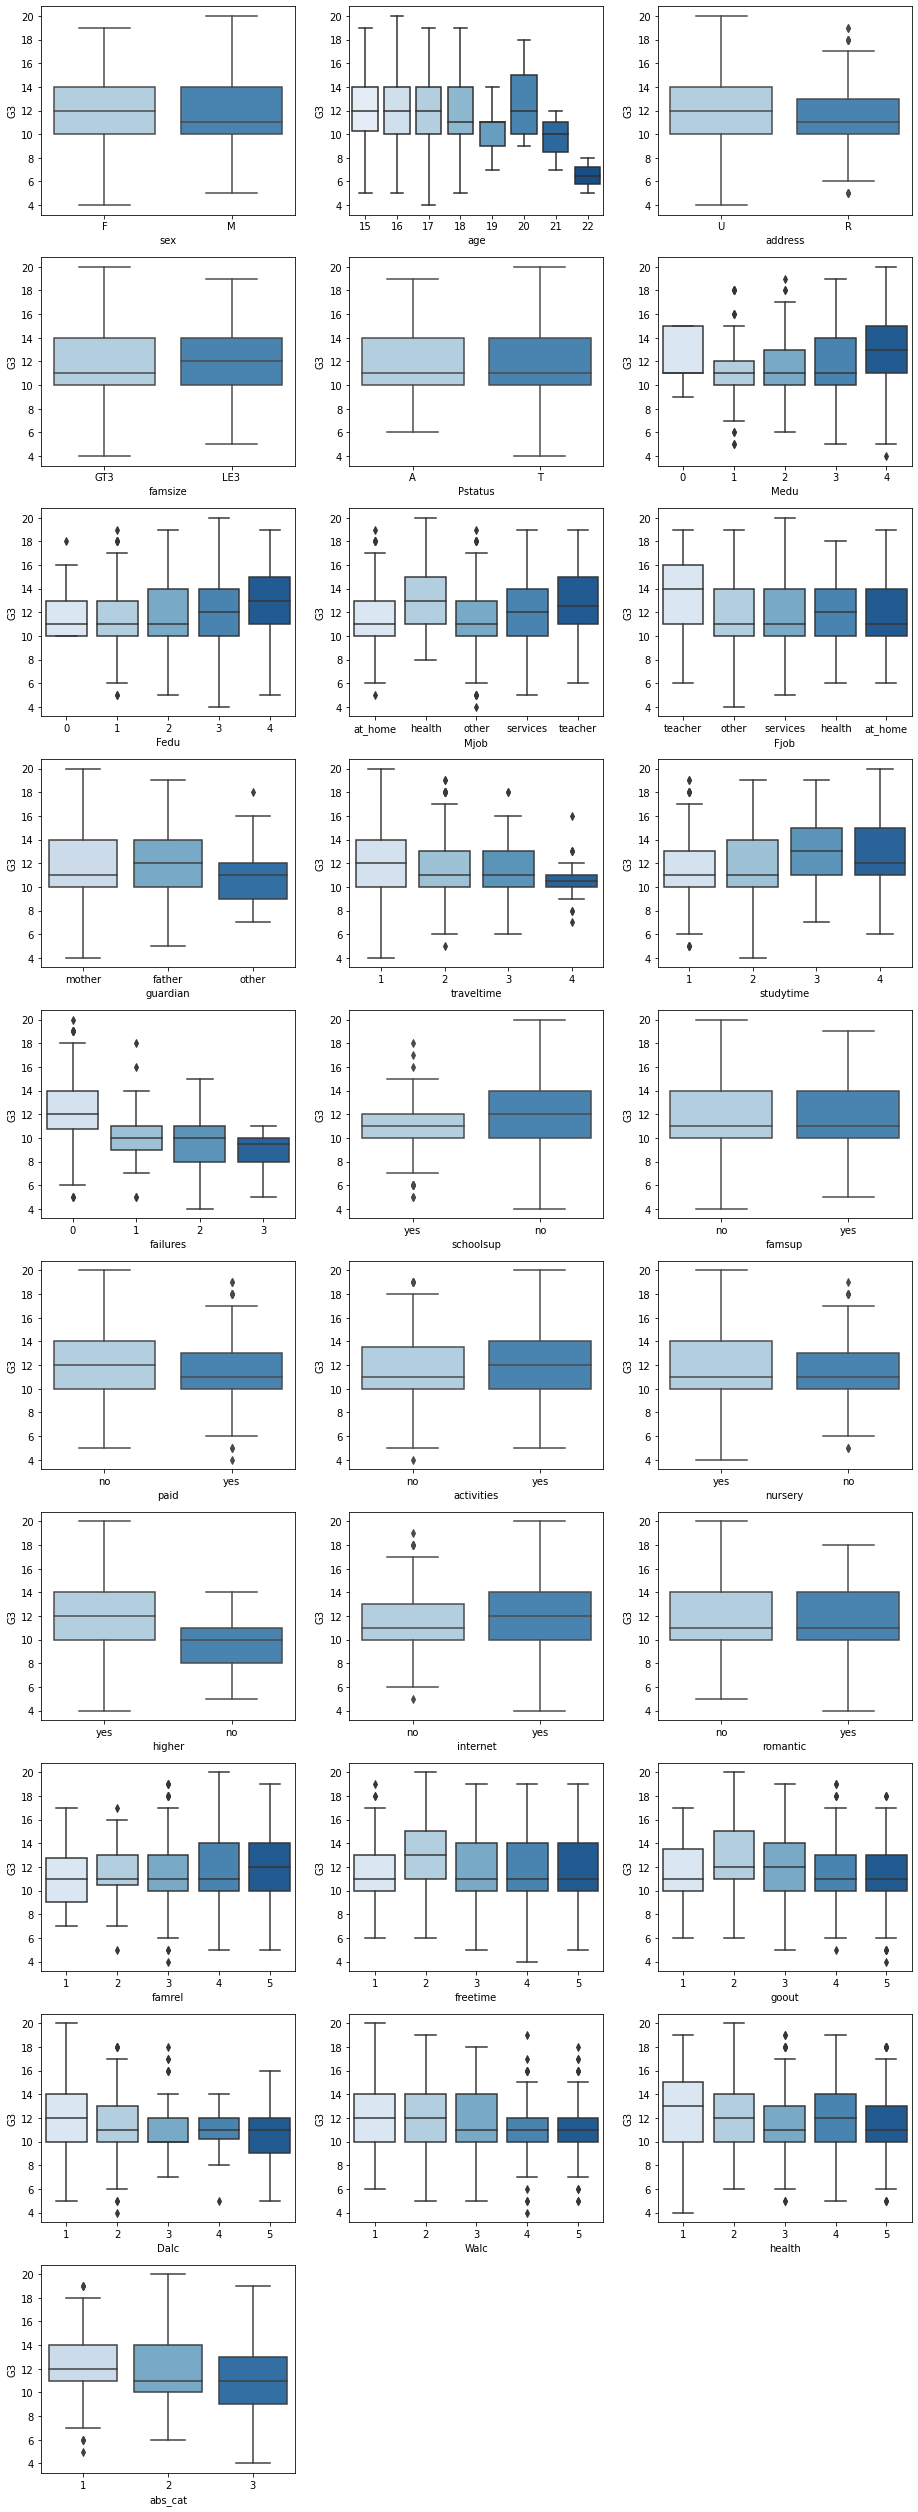

In [25]:
fig, ax = plt.subplots(ncols = 3, nrows = 10, figsize = (13, 35))
for i in range(10): 
    ax_i1 = ax[i, 0]
    sns.boxplot(data = data, x = categoricals[i*3], ax = ax_i1, palette='Blues', y=Target)  
    if (i*3 + 1 == len(categoricals)):
        break
    ax_i2 = ax[i, 1]
    sns.boxplot(data = data, x = categoricals[i*3+1], ax = ax_i2, palette='Blues', y=Target)  
    ax_i3 = ax[i, 2]
    sns.boxplot(data = data, x = categoricals[i*3+2], ax = ax_i3, palette='Blues', y=Target)  
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)
fig.tight_layout()
plt.show()

## Features Engineering ##

### Encoding Data ###

* **Create mapping**

In [26]:
binary_map = {
    'yes': 1,
    'no' : 0,
# `sex`
    'M'  : 1,
    'F'  : 0,
# `adress`
    'U'  : 1,
    'R'  : 0,
# `famsize`
    'GT3': 1,
    'LE3': 0,
# Pstatus
    'T'  : 1,
    'A'  : 0    
}

# Mjob/Fjob
job_map = {
    'health'     : 1,
    'teacher'   : 2,
    'services'  : 3,
    'other'     : 4,
    'at_home'   : 5
}

# guardian
guard_map = {
    'mother' : 1,
    'father' : 2,
    'other'  : 3
}


* **Label encoding**

In [27]:
# map the binary columns
for col in data.columns:
    if data[col].value_counts().count() == 2:
        data[col] = data[col].map(binary_map)

# map the job columns
data['Mjob'] = data['Mjob'].map(job_map)
data['Fjob'] = data['Fjob'].map(job_map)

# map the guardian column
data['guardian'] = data['guardian'].map(guard_map)


* **Review features**

In [28]:
data[data.columns[:14]].head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup
0,0,18,1,1,0,4,4,5,2,1,2,2,0,1
1,0,17,1,1,1,1,1,5,4,2,1,2,0,0
2,0,15,1,0,1,1,1,5,4,1,1,2,3,1
3,0,15,1,1,1,4,2,1,3,1,1,3,0,0
4,0,16,1,1,1,3,3,4,4,2,1,2,0,0


In [29]:
data[data.columns[14:]].head()

,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G3,abs_cat
0,0,0,0,1,1,0,0,4,3,4,1,1,3,6.0,2
1,1,0,0,0,1,1,0,5,3,3,1,1,3,6.0,2
2,0,1,0,1,1,1,0,4,3,2,2,3,3,10.0,3
3,1,1,1,1,1,1,1,3,2,2,1,1,5,15.0,1
4,1,1,0,1,1,0,0,4,3,2,1,2,5,10.0,2


In [30]:
null_col = [col for col in data.columns if data[col].isnull().sum() > 0]
print(null_col)

[]


### Feature Selection ###

<AxesSubplot:>

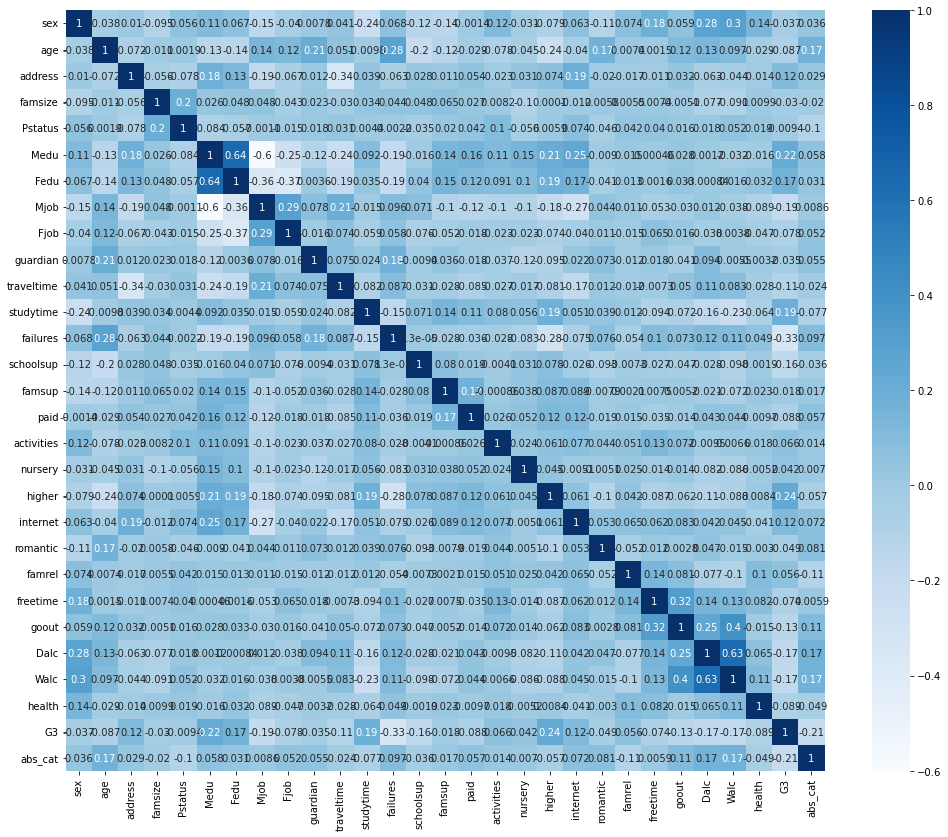

In [31]:
correlations = data.corr()
plt.figure(figsize=(17,14))
sns.heatmap(correlations, annot=True, cmap='Blues')

* **The correlation matrix may be too complex now**
<br><br>
*--> We should use another appoarch to select important features*

In [32]:
# import some neccessary libaries
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=[Target], axis= 1),
    data[Target],
    test_size= 0.3,
    random_state=123
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((733, 28), (315, 28), (733,), (315,))

* **We will group the features according to the correlationships**

In [34]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.2]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
print(corrmat.shape)
corrmat.head()

(48, 3)


,feature1,feature2,corr
0,Medu,Fedu,0.640738
1,Fedu,Medu,0.640738
2,Medu,Mjob,0.632323
3,Mjob,Medu,0.632323
4,Dalc,Walc,0.619054


In [35]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 7 correlated groups
out of 28 total features


In [36]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print('-----------------------------------------')

   feature1    feature2      corr
0      Medu        Fedu  0.640738
2      Medu        Mjob  0.632323
28     Medu        Fjob  0.259188
35     Medu    internet  0.240032
37     Medu  traveltime  0.232194
-----------------------------------------
   feature1 feature2      corr
4      Dalc     Walc  0.619054
23     Dalc      sex  0.271256
33     Dalc    goout  0.246183
-----------------------------------------
   feature1    feature2     corr
12  address  traveltime  0.33001
41  address    internet  0.22419
-----------------------------------------
    feature1 feature2      corr
14  freetime    goout  0.325473
-----------------------------------------
    feature1 feature2      corr
24  failures   higher  0.268990
27  failures      age  0.264838
-----------------------------------------
     feature1 feature2      corr
39  studytime      sex  0.229551
42  studytime     Walc  0.217970
-----------------------------------------
   feature1 feature2      corr
44  famsize  Pstatus  0.206364


* *Correlation groups investigation*

1. Group 1

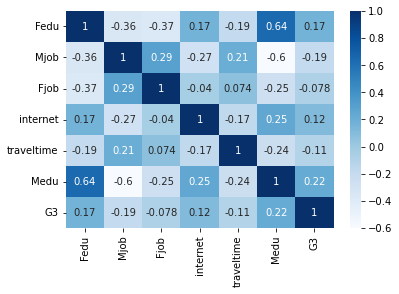

In [37]:
group_1 = list(correlated_groups[0].feature2.unique())+['Medu', Target]
corr_1 = data[group_1].corr()
sns.heatmap(data= corr_1, annot= True, cmap='Blues')
plt.show()

As we can see, The `Medu` is most correlate to Target (`G3`)
<br>*--> We will keep the `Medu` feature*

In [38]:
drop_features = group_1.copy()
drop_features.remove('Medu')
drop_features.remove('G3')
drop_features

['Fedu', 'Mjob', 'Fjob', 'internet', 'traveltime']

2. Group 2

<AxesSubplot:>

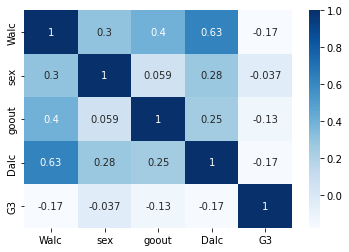

In [39]:
group_2 = list(correlated_groups[1].feature2.unique())+['Dalc', Target]
corr_2 = data[group_2].corr()
sns.heatmap(data= corr_2, annot= True, cmap='Blues')

*--> We will keep the `Walc` feature*

In [40]:
drop_features = drop_features + group_2
drop_features.remove('Walc')
drop_features.remove('G3')
drop_features

['Fedu', 'Mjob', 'Fjob', 'internet', 'traveltime', 'sex', 'goout', 'Dalc']

3. Group 3

<AxesSubplot:>

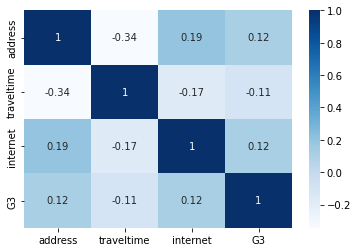

In [41]:
corr_3 = data[['address', 'traveltime', 'internet', 'G3']].corr()
sns.heatmap(data= corr_3, annot= True, cmap='Blues')

*--> Keep the `address` because we have already dropped `traveltime` and `internet`*

4. Group 4

*`freetime` vs `goout`*
<br><br>
*--> Keep the `freetime` because `goout` is dropped*

5. Group 5

<AxesSubplot:>

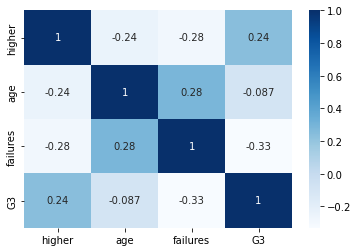

In [42]:
group_5 = list(correlated_groups[4].feature2.unique())+['failures', Target]
corr_5 = data[group_5].corr()
sns.heatmap(data= corr_5, annot= True, cmap='Blues')

*--> We will keep the `failure` feature*

In [43]:
drop_features = drop_features + ['higher', 'age']
drop_features

['Fedu',
 'Mjob',
 'Fjob',
 'internet',
 'traveltime',
 'sex',
 'goout',
 'Dalc',
 'higher',
 'age']

6. Group 6

*`studytime` vs `sex` vs `Walc`*
<br><br>
*--> Keep the `studytime` because `sex` and `Walc` is dropped*

7. Group 7

<AxesSubplot:>

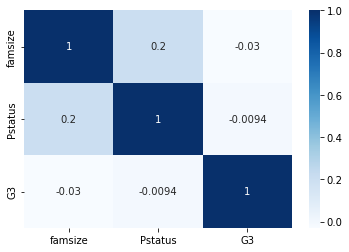

In [44]:
corr_6 = data[['famsize', 'Pstatus', 'G3']].corr()
sns.heatmap(data= corr_6, annot= True, cmap='Blues')

*--> We can drop both features because their correlations to the target is very low*

In [45]:
drop_features = drop_features + ['famsize', 'Pstatus']
drop_features

['Fedu',
 'Mjob',
 'Fjob',
 'internet',
 'traveltime',
 'sex',
 'goout',
 'Dalc',
 'higher',
 'age',
 'famsize',
 'Pstatus']

We also remove features with too low correlation to the target

In [46]:
low_corrs = [col for col in data.columns if abs(data.corr()[Target].loc[col]) < 0.06]
low_corrs

['sex',
 'famsize',
 'Pstatus',
 'guardian',
 'famsup',
 'nursery',
 'romantic',
 'famrel']

In [47]:
drop_features = set(drop_features + low_corrs)

In [48]:
new_data = data.drop(drop_features, axis=1)
new_data.shape

(1048, 12)

* *Review the correlation matrix*

<AxesSubplot:>

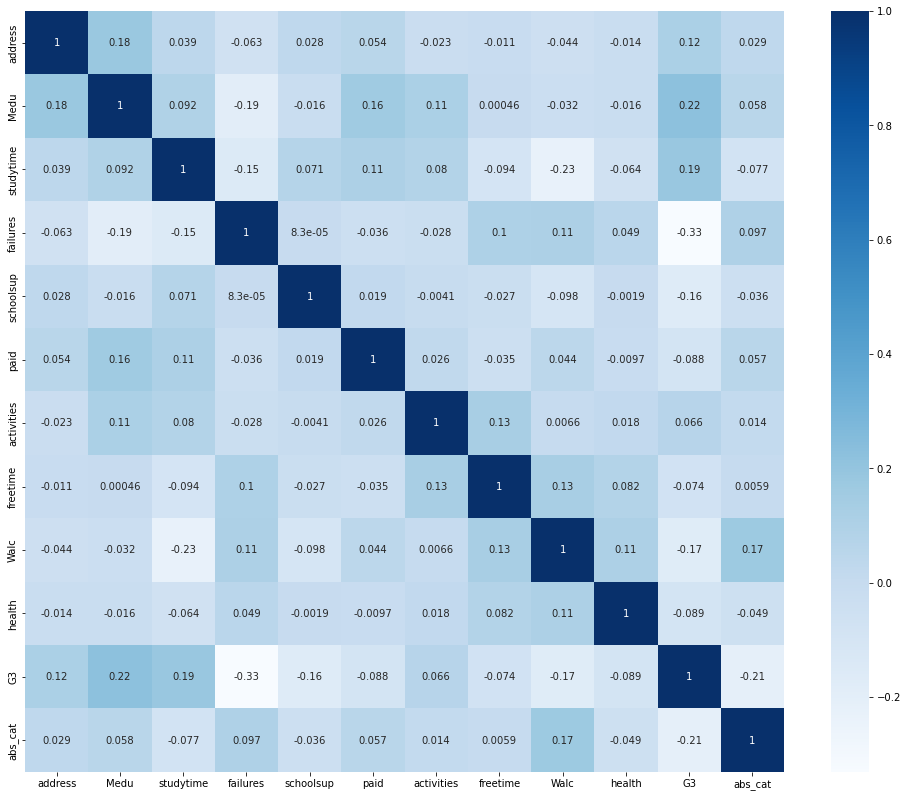

In [49]:
correlations = new_data.corr()
plt.figure(figsize=(17,14))
sns.heatmap(correlations, annot=True, cmap='Blues')

## Model Selection ##

* **Splitting data**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    new_data.drop(Target, axis=1),
    new_data[Target],
    test_size= 0.2,
    random_state= 0
    )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(838, 11) (838,)
(210, 11) (210,)


* **Cross Validation**

In [51]:
# import library

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

* **Regression Algorithm**
<br>
1. Linear Regression<br>
2. Random Forest<br>
3. Support Vector Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [81]:
Errors = [0.0, 0.0, 0.0]

### 1. Linear Regression ###

In [82]:
KF = KFold(n_splits=4, shuffle=True, random_state=0).split(X_train, y_train)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = KF, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 13 candidates, totalling 52 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000029A406D8890>,
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [83]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [84]:
# final model
n_features_optimal = 8

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = model_cv.best_estimator_          
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
Errors[0] = MSE
print(MSE)

4.95582588048479


### 2. Random Forest ###

In [85]:
KF = KFold(n_splits=4, shuffle=True, random_state=0).split(X_train, y_train)

hyper_params = [
    {'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 15, 20, None],
    'max_leaf_nodes' : [5, 10, 25, 50, 100]}
 ]

RandForest = RandomForestRegressor()
model_cv = GridSearchCV(
    estimator= RandForest,
    param_grid= hyper_params,
    scoring= 'neg_mean_squared_error',
    cv=KF
)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000029A413AC740>,
             estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10, 15, 20, None],
                          'max_leaf_nodes': [5, 10, 25, 50, 100],
                          'n_estimators': [50, 100, 200]}],
             scoring='neg_mean_squared_error')

In [86]:
model_cv.best_estimator_

RandomForestRegressor(max_depth=20, max_leaf_nodes=50)

In [91]:
RandForest = model_cv.best_estimator_
RandForest.fit(X_train, y_train)
y_pred = RandForest.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
Errors[1] = MSE
print(MSE)

4.786381143805442


### 3. Support Vector Regression ###

In [92]:
KF = KFold(n_splits=4, shuffle=True, random_state=0).split(X_train, y_train)

hyper_params = [
    {'C': [0.1, 1, 10], 
    'gamma': [1,0.1],
    'kernel': ['linear', 'sigmoid']}
 ]
 
SVectorR = SVR()

model_cv = GridSearchCV(
    estimator= SVectorR,
    param_grid= hyper_params,
    scoring= 'neg_mean_squared_error',
    cv=KF
)

model_cv.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000029A413C4900>,
             estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [1, 0.1],
                          'kernel': ['linear', 'sigmoid']}],
             scoring='neg_mean_squared_error')

In [93]:
model_cv.best_estimator_

SVR(C=1, gamma=1, kernel='linear')

In [94]:
SVectorR = model_cv.best_estimator_
SVectorR.fit(X_train, y_train)
y_pred = SVectorR.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
Errors[2] = MSE
print(MSE)

5.135135176131999


## Model Comparision ##

In [102]:
error2plot = {
    'Algorithm' : ['Linear Regression', 'Random Forest', 'Support Vector Regression'],
    'MSE' : Errors,
}

In [106]:
cm = sns.light_palette('blue', as_cmap=True)
errors = pd.DataFrame(error2plot).style.background_gradient(cmap=cm)
errors

,Algorithm,MSE
0,Linear Regression,4.955826
1,Random Forest,4.786381
2,Support Vector Regression,5.135135


[Text(0, 0, '4.95583'), Text(0, 0, '4.78638'), Text(0, 0, '5.13514')]

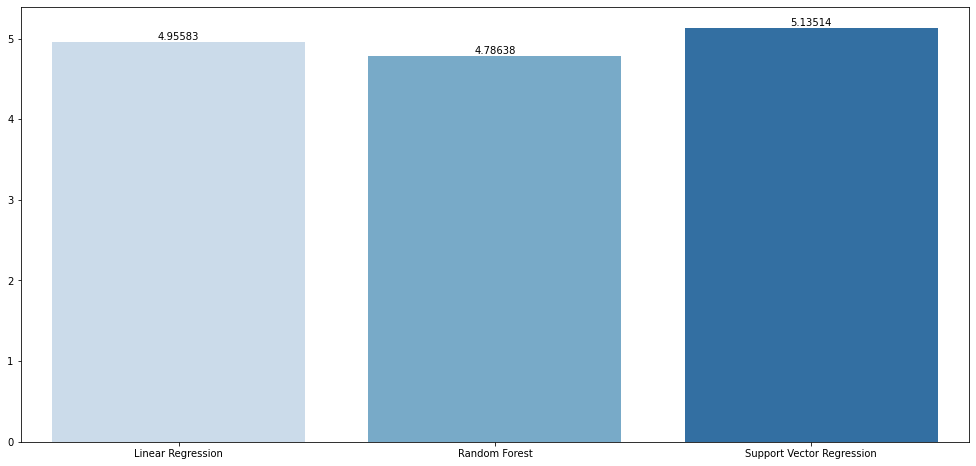

In [104]:
plt.figure(figsize=(17,8))
ax = sns.barplot(data=error2plot, x = 'Algorithm', y = 'MSE', palette='Blues')
ax.bar_label(ax.containers[0])